## 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

## 2. Read Data

In [5]:
data = pd.read_csv(r'E:\Vinod\DataScience\Iris\Iris.csv',usecols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
data.head()

FileNotFoundError: [Errno 2] No such file or directory: './IrisProject/IrisDataset/Iris.csv'

## 3. Split Train & Test Data

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train, test = train_test_split(data,test_size=0.2,random_state=19)

## 4. Exploaratory Data Analys

In [5]:
print('Train Data Shape: ',train.shape)

Train Data Shape:  (120, 5)


In [6]:
print('Test Data Shape: ',test.shape)

Test Data Shape:  (30, 5)


In [7]:
print('Unique Classes:\n', train['Species'].unique())

Unique Classes:
 ['Iris-setosa' 'Iris-virginica' 'Iris-versicolor']


In [8]:
print('Class Value Counts:\n',train['Species'].value_counts() )

Class Value Counts:
 Iris-virginica     42
Iris-setosa        40
Iris-versicolor    38
Name: Species, dtype: int64


In [9]:
print('Class Value Counts %:\n',(train['Species'].value_counts()/train.shape[0])*100)

Class Value Counts %:
 Iris-virginica     35.000000
Iris-setosa        33.333333
Iris-versicolor    31.666667
Name: Species, dtype: float64


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 24 to 93
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  120 non-null    float64
 1   SepalWidthCm   120 non-null    float64
 2   PetalLengthCm  120 non-null    float64
 3   PetalWidthCm   120 non-null    float64
 4   Species        120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


In [11]:
train.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,120.000000,120.000000,120.000000,120.000000
mean,5.874167,3.060000,3.783333,1.213333
std,0.840218,0.449911,1.784590,0.770456
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.900000,3.000000,4.450000,1.350000
75%,6.425000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
train.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### 4.1 Univariate Analysis

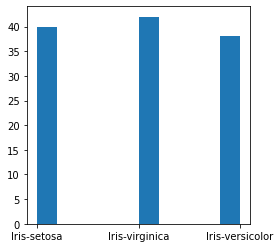

In [13]:
plt.figure(figsize=(4,4))
plt.hist(train['Species'])
plt.show()

<AxesSubplot:ylabel='Density'>

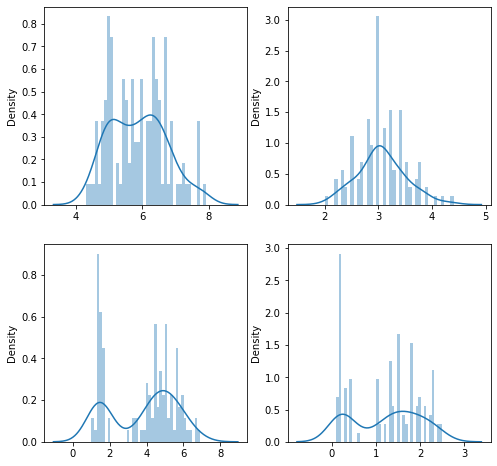

In [14]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.distplot(x=train['SepalLengthCm'],kde=True,bins=40)
plt.subplot(2,2,2)
sns.distplot(x=train['SepalWidthCm'],kde=True,bins=40)
plt.subplot(2,2,3)
sns.distplot(x=train['PetalLengthCm'],kde=True,bins=40)
plt.subplot(2,2,4)
sns.distplot(x=train['PetalWidthCm'],kde=True,bins=40)

### 4.2 Multivariate Analysis

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

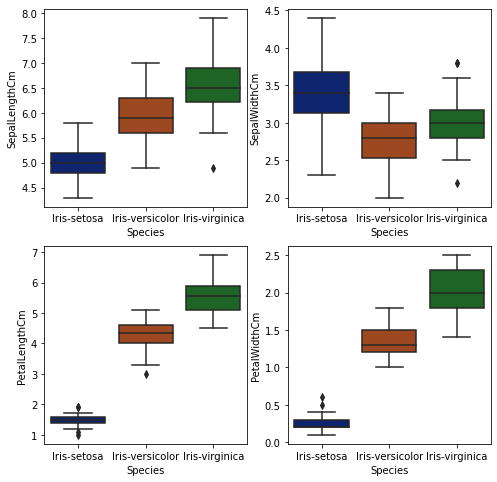

In [15]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=data,palette='dark')
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=data,palette='dark')
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=data,palette='dark')
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=data,palette='dark')

<AxesSubplot:>

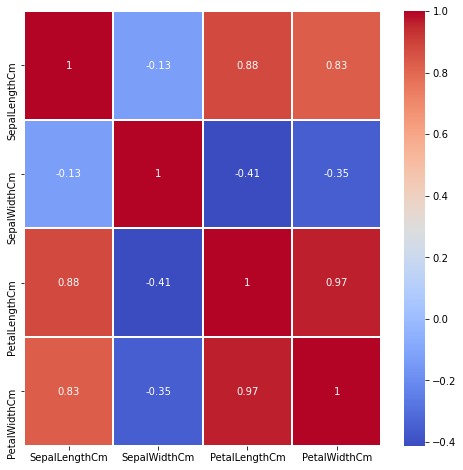

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(),annot=True,cmap='coolwarm',linecolor='White',linewidth=1)

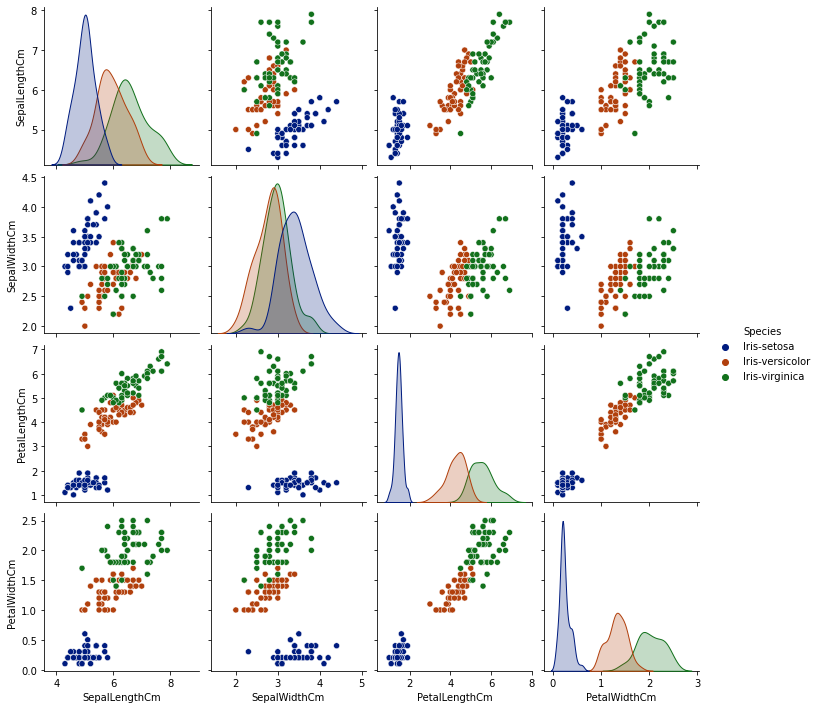

In [17]:
sns.pairplot(data,hue='Species',palette='dark')

## 5. Model Training

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [19]:
train['Species'][train['Species']=='Iris-versicolor'] = 0
train['Species'][train['Species']=='Iris-setosa'] = 1
train['Species'][train['Species']=='Iris-virginica'] = 2

In [20]:
test['Species'][test['Species']=='Iris-versicolor'] = 0
test['Species'][test['Species']=='Iris-setosa'] = 1
test['Species'][test['Species']=='Iris-virginica'] = 2

In [21]:
train.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [22]:
X_train = train.drop(['Species'],axis=1)
y_train = train['Species']
y_train = pd.to_numeric(y_train)

X_test = train.drop(['Species'],axis=1)
y_test = train['Species']
y_test = pd.to_numeric(y_test)

In [23]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [24]:
scoring = 'accuracy'
results = []
names = []
for name, model in models:
    model.fit(X_train,y_train)
    model
    kfold = model_selection.KFold(n_splits=10, random_state=19)
    cv_results = model_selection.cross_val_score(model, X_train,y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.950000 (0.084984)
DT: 0.925000 (0.069222)
LDA: 0.975000 (0.038188)
KNN: 0.950000 (0.066667)
NB: 0.950000 (0.076376)
SVM: 0.933333 (0.081650)


In [25]:
print("SVC Performance")
print('=='*20)
SVM = SVC()
SVM.fit(X_train,y_train)
predictions = SVM.predict(X_test)
print('Accuracy Score: \n',accuracy_score(y_test, predictions))
print('=='*20)
print ('Confusion Matrix: \n ',confusion_matrix(y_test, predictions))
print('=='*30)
print ('Classification Report: \n', classification_report(y_test, predictions))
print('=='*30)

SVC Performance
Accuracy Score: 
 0.9666666666666667
Confusion Matrix: 
  [[36  0  2]
 [ 0 40  0]
 [ 2  0 40]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       1.00      1.00      1.00        40
           2       0.95      0.95      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

